<a href="https://colab.research.google.com/github/jha-vineet69/Minimizing-Churn-Rate/blob/main/Minimizing_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>MINIMIZING CHURN RATE</center>
## <center>THROUGH ANALYSIS OF FINANCIAL HABITS</center>
### <center>By Vineet Jha</center>
<figure>
<center>
<img src='https://drive.google.com/uc?id=1EMXwx5oF349T-ZVc_1iiXKkDJ4S3woQP'/>
</center>
</figure>

# Introduction

Subscription Products often are the main source of revenue for companies across all industries. These products can come in the form of a 'one size fits all' overcompassing subscription, or in multi-level memberships.

Regardless of how they structure their memberships, or what industry they are in, companies almost always try to minimize Customer Churn (a.k.a. subscription cancellations). To retain their customers, these companies first need to identify behavioral patterns that act as catalyst in disengagement with the product.

* Market: The target audience is the entirety of a company’s subscription base. They are the ones companies want to keep.

* Product: The subscription products that customers are already enrolled in can provide value that users may not have imagined, or that they may have forgotten.

* Goal: The objective of this model is to predict which users are likely to churn, so that the company can focus on re-engaging these users with the product. These efforts can be email reminders about the benefits of the product, especially focusing on features that are new or that the user has shown to value.

# Application

### a).  Problem Description

* In this Case Study we will be working for a fintech company that provides a subscription product to its users, which allows them to manage their bank accounts (saving accounts, credit cards, etc), provides them with personalized coupons, informs them of the latest low-APR loans available in the market, and educates them on the best available methods to save money (like videos on saving money on taxes, free courses on financial health, etc).

* We are in charge of identifying users who are likely to cancel their subscription so that we can start building new features that they may be interested in. These features can increase the engagement and interest of our users towards the product.

### b).  Dataset Description

* By subscribing to the membership, our customers have provided us with data on their finances, as well as how they handle those finances through the product. We also have some demographic information we acquired from
them during the sign-up process.

* Financial data can often be unreliable and delayed. As a result, companies can sometimes build their marketing models using only demographic data, and data related to finances handled through the product itself. Therefore,
we will be restricting ourselves to only using that type of data. Furthermore, product-related data is more indicative of what new features we should be creating as a company.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import random
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.feature_selection import RFE

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/jha-vineet69/Minimizing-Churn-Rate/main/churn_data.csv') # Users who were 60 days enrolled, churn in the next 30

### EDA

In [3]:
dataset.head(10) # Viewing the Data

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,Bi-Weekly,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,96,0,0,5,1,1,1,1,0,0,Weekly,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,285,0,0,9,1,0,0,0,1,2,Semi-Monthly,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,74,0,0,26,1,0,0,0,1,0,Bi-Weekly,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,0,0,0,0,1,1,1,0,1,0,Bi-Weekly,0,0,0,0,Aries,1,0,1.0,0.03,0
5,3120,1,32.0,R,567.0,5,3,111,5,0,227,0,0,17,1,1,1,0,1,0,Bi-Weekly,0,0,0,0,Taurus,0,0,55.0,1.83,0
6,41406,0,21.0,na,475.0,0,0,4,0,0,0,0,0,0,1,0,0,0,1,0,Bi-Weekly,0,0,0,0,Cancer,0,0,2.0,0.07,0
7,67679,0,24.0,na,NaN,0,0,2,0,0,0,0,0,0,1,0,0,0,1,0,na,0,0,0,0,Leo,0,0,1.0,0.11,0
8,21269,0,28.0,R,548.0,0,0,0,0,2,47,1,0,9,1,1,1,1,0,0,Bi-Weekly,0,0,0,0,Sagittarius,0,0,26.0,0.87,1
9,25788,0,23.0,na,658.0,1,0,87,1,0,125,0,0,3,1,1,1,1,0,0,Bi-Weekly,0,0,0,0,Aquarius,0,0,32.0,1.07,0


In [4]:
dataset.columns

Index(['user', 'churn', 'age', 'housing', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'app_web_user', 'ios_user',
       'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')

In [5]:
dataset.describe().T # Distribution of Numerical Variables

,count,mean,std,min,25%,50%,75%,max
user,27000.0,35422.702519,20321.006678,1.0,17810.5,35749.00,53244.25,69658.0
churn,27000.0,0.413852,0.492532,0.0,0.0,0.00,1.00,1.0
age,26996.0,32.219921,9.964838,17.0,25.0,30.00,37.00,91.0
credit_score,18969.0,542.944225,61.059315,2.0,507.0,542.00,578.00,838.0
deposits,27000.0,3.341556,9.131406,0.0,0.0,0.00,1.00,65.0
withdrawal,27000.0,0.307000,1.055416,0.0,0.0,0.00,0.00,29.0
purchases_partners,27000.0,28.062519,42.219686,0.0,0.0,9.00,43.00,1067.0
purchases,27000.0,3.273481,8.953077,0.0,0.0,0.00,1.00,63.0
cc_taken,27000.0,0.073778,0.437299,0.0,0.0,0.00,0.00,29.0
cc_recommended,27000.0,92.625778,88.869343,0.0,10.0,65.00,164.00,522.0


In [6]:
dataset[dataset.credit_score < 300]

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
7347,45685,1,22.0,na,3.0,0,0,16,0,0,42,0,0,0,1,1,1,0,1,0,na,0,0,0,0,na,0,0,16.0,0.53,0
9244,33603,0,28.0,na,2.0,0,0,5,0,0,6,0,0,0,1,1,1,0,1,0,Weekly,0,0,0,0,Aquarius,0,0,1.0,0.04,0
11978,2465,0,32.0,R,3.0,42,5,56,42,0,209,0,0,41,1,1,1,1,1,3,Bi-Weekly,0,0,0,0,Libra,0,0,24.0,0.80,1
18857,33700,1,22.0,na,2.0,0,0,0,0,0,21,0,0,2,1,0,0,1,0,0,Bi-Weekly,0,0,0,0,Gemini,0,0,6.0,0.20,0


In [7]:
dataset = dataset[~(dataset['credit_score'] < 300)]  

In [8]:
dataset.isna().any()

user                       False
churn                      False
age                         True
housing                    False
credit_score                True
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
rewards_earned              True
reward_rate                False
is_referre

In [9]:
dataset.isna().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [10]:
dataset2 = dataset.drop(columns = ['credit_score', 'rewards_earned'])

In [11]:
my_color = ['#287271', '#EE8959', '#8AB17D', '#E9C46A', '#564787', '#219ebc', '#d90429']

In [12]:
dataset3 = dataset2.drop(columns = ['user', 'churn'])

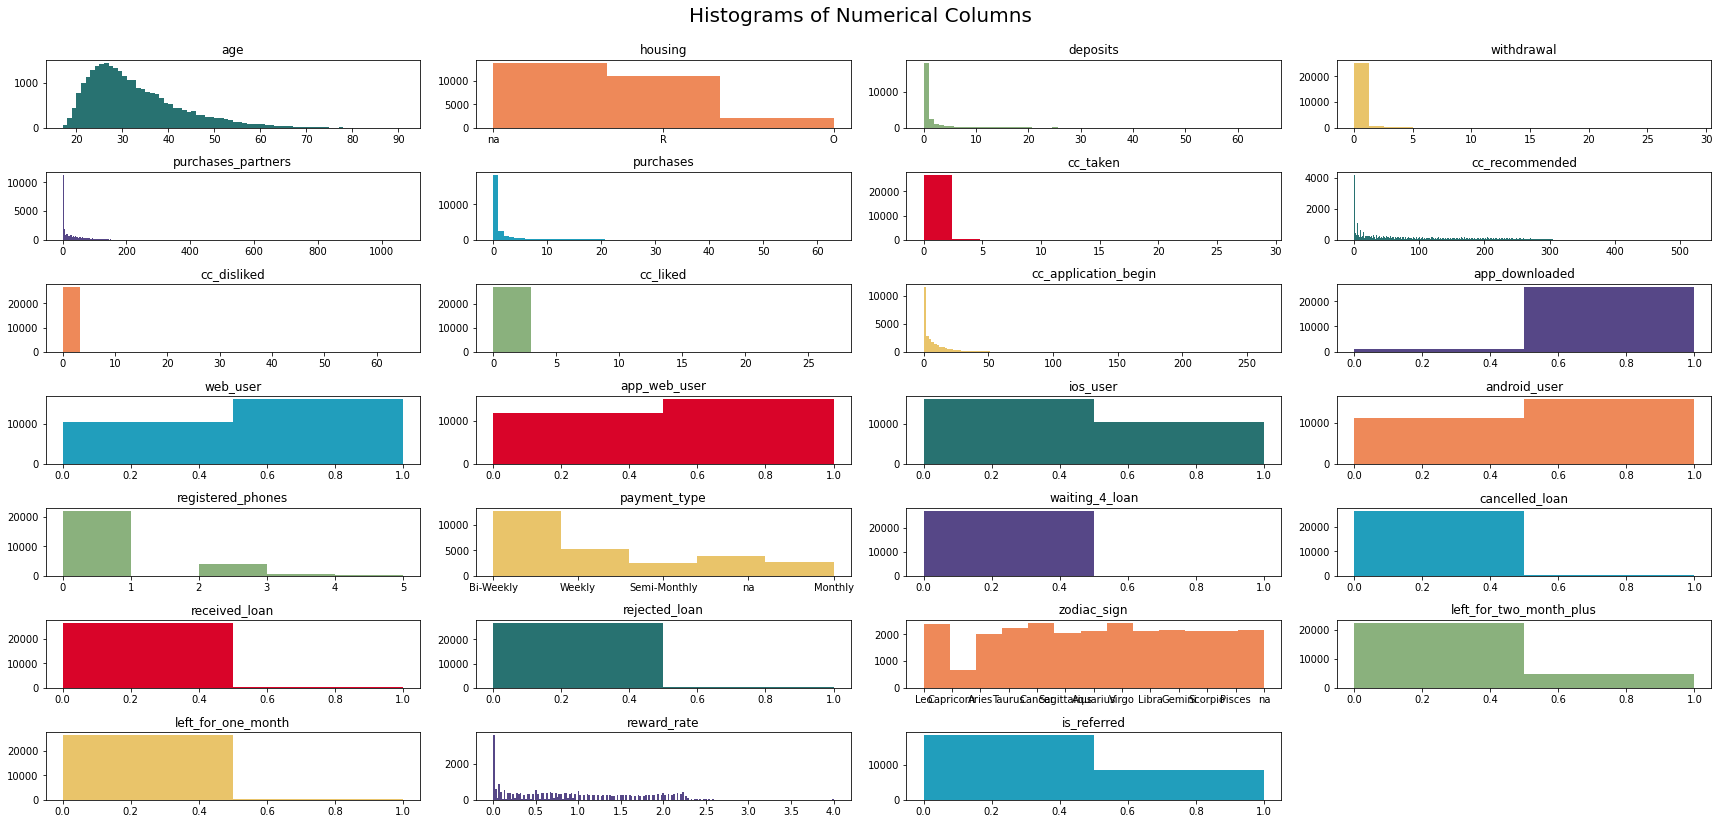

In [13]:
## Histograms
fig = plt.figure(figsize=(24, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(1, dataset3.shape[1] + 1):
    plt.subplot(7, 4, i)
    f = plt.gca()
    f.set_title(dataset3.columns.values[i - 1])

    vals = np.size(dataset3.iloc[:, i - 1].unique())
    
    plt.hist(dataset3.iloc[:, i - 1], bins=vals, color=my_color[(i-1)%7])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('churn_rate_hist.jpg')

#### Inferences:
* Age: Ranges from 18 to 78 and rightly so as you have to be atleast 18 to be eligible for the financial services offered in this app.
* Housing: Most of the records are missing and should be dealt with later on.
* Deposits, Withdrawal, Purchases, Purchases at Partner Stores: Since we are dealing with data having info about users enrolled around a couple of months ago, the deposits, purchases etc are mostly zero.
* App Downloaded, Web User: It shows us that most have downloaded the app but don't generally prefer web app interface.
* Android vs iOS: Since most customers have 1 registered phone it can either be an Android or an iOS phone. Also most customers are using Android app than iOS.
* Payment Type: Bi-Weekly is by far the most common mode of payment.


In [14]:
dataset4 = dataset3[['housing', 'is_referred', 'app_downloaded',
                    'web_user', 'app_web_user', 'ios_user',
                    'android_user', 'registered_phones', 'payment_type',
                    'waiting_4_loan', 'cancelled_loan',
                    'received_loan', 'rejected_loan', 'zodiac_sign',
                    'left_for_two_month_plus', 'left_for_one_month']]

In [15]:
my_color2 = ['#287271', '#EE8959', '#8AB17D', '#E9C46A', '#564787', '#219ebc', '#d90429', '#c2c2f0', '#ffb3e6', '#2ec4b6', '#e27396', '#aaf683', '#ef476f']

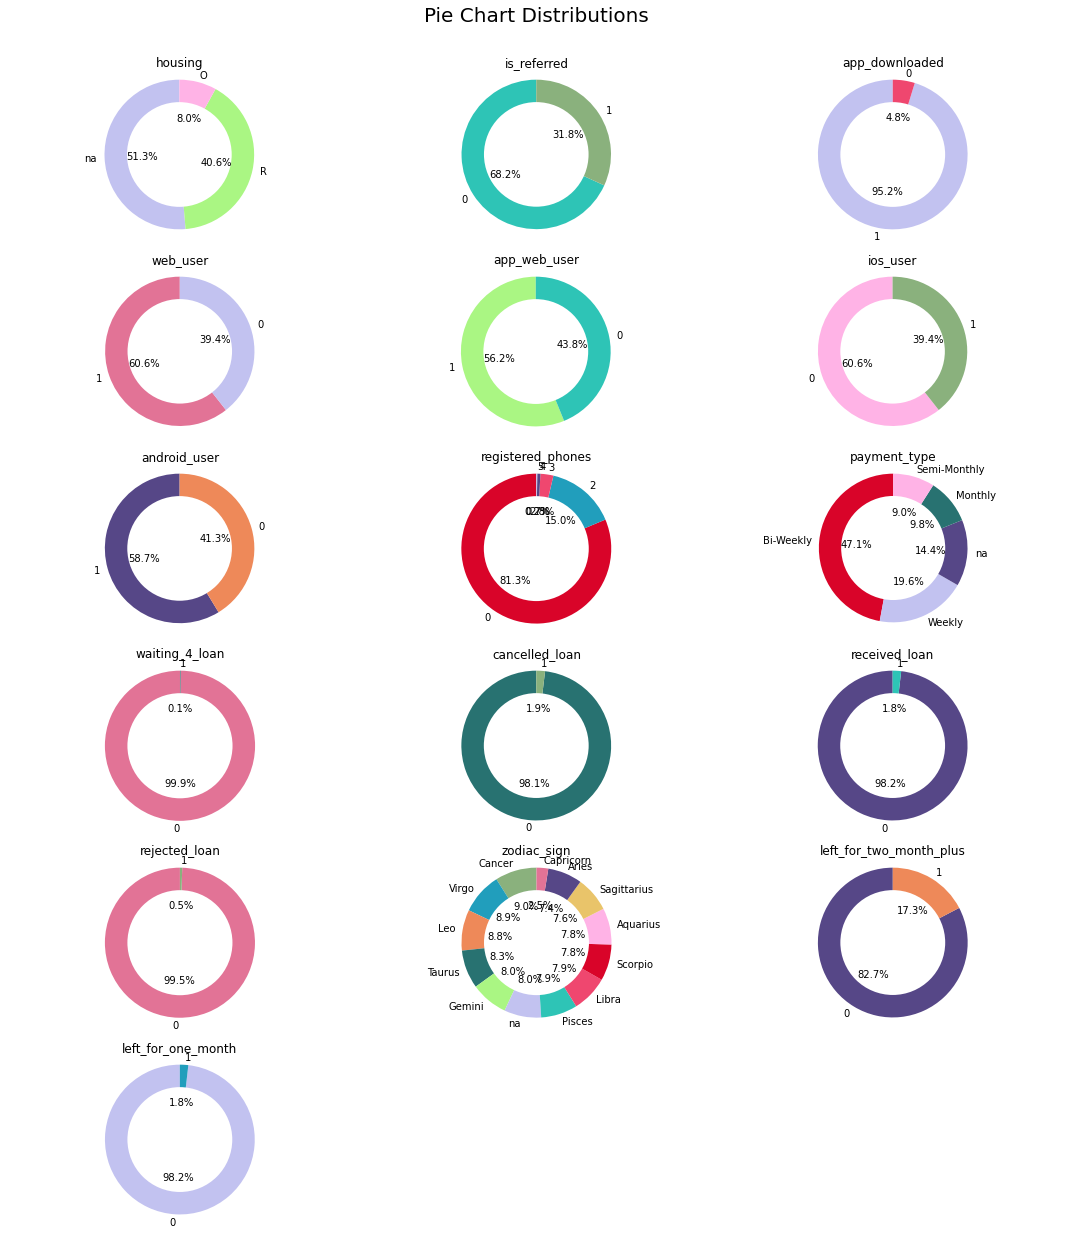

In [16]:
## Pie Plots
fig = plt.figure(figsize=(15, 18))
plt.suptitle('Pie Chart Distributions', fontsize=20)
for i in range(1, dataset4.shape[1] + 1):
    plt.subplot(6, 3, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset4.columns.values[i - 1])
   
    values = dataset4.iloc[:, i - 1].value_counts(normalize = True).values
    index = dataset4.iloc[:, i - 1].value_counts(normalize = True).index
    plt.pie(values, labels = index, autopct='%1.1f%%', startangle=90, pctdistance=0.5, colors = random.sample(my_color2, len(index)))
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    plt.axis('equal')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

In [17]:
## Exploring Uneven Features
dataset[dataset4.waiting_4_loan == 1].churn.value_counts()

0    27
1     8
Name: churn, dtype: int64

In [18]:
dataset[dataset4.cancelled_loan == 1].churn.value_counts()

1    274
0    234
Name: churn, dtype: int64

In [19]:
dataset[dataset4.received_loan == 1].churn.value_counts()

1    292
0    199
Name: churn, dtype: int64

In [20]:
dataset[dataset4.rejected_loan == 1].churn.value_counts()

1    107
0     25
Name: churn, dtype: int64

In [21]:
dataset[dataset4.left_for_one_month == 1].churn.value_counts()

1    266
0    222
Name: churn, dtype: int64

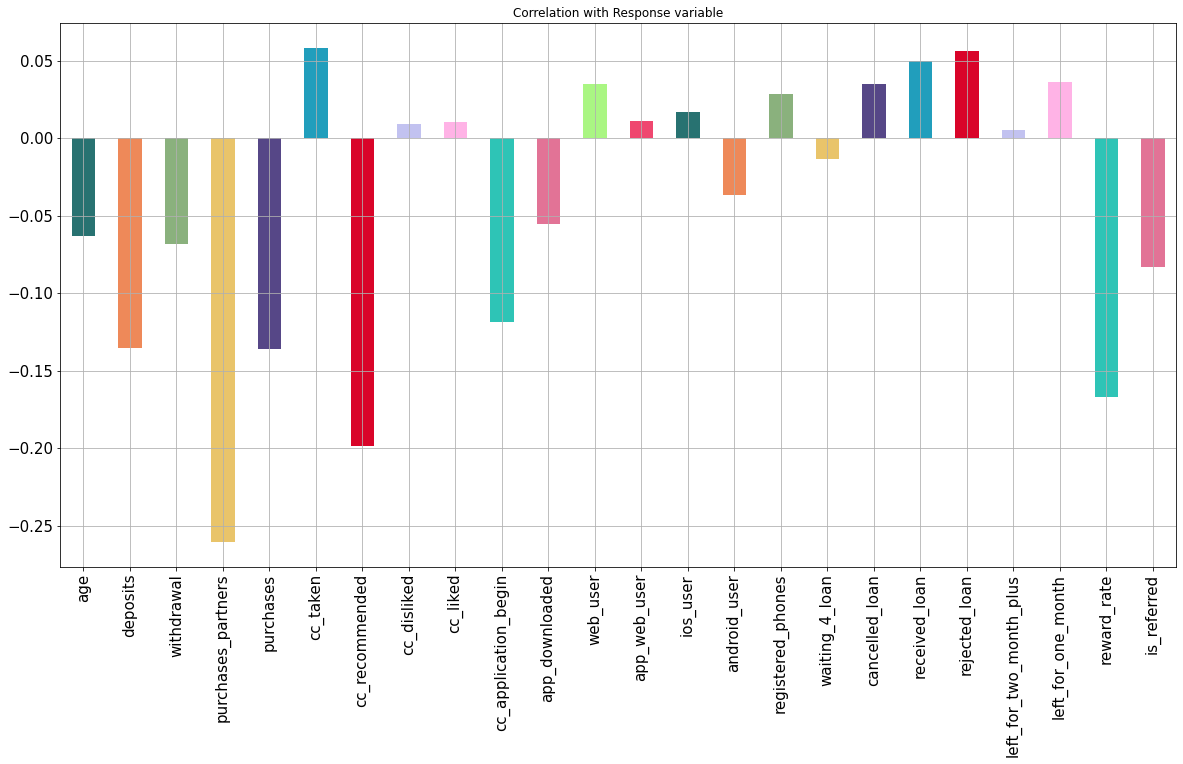

In [22]:
## Correlation with Response Variable
dataset3.drop(columns = ['housing', 'payment_type',
                         'zodiac_sign']
    ).corrwith(dataset.churn).plot.bar(figsize=(20,10),
              title = 'Correlation with Response variable',
              fontsize = 15, rot = 90,
              grid = True,
              color = my_color2);


#### Inferences:
* Most features are negatively correlated with the response variable although not strongly so.  
* Deposits, Withdrawals, Purchases, Purchases from Partners columns tell us that the less activity you have, more likely you are to churn.
* Customers who have taken credit card are churning, maybe because some features related to credit card are not up to the mark or the charges etc are too much.
* Web users are more likely to churn than app users. Maybe the web interface is cluttered or UI/UX is not appealing.
* If you are referred by someone, you are less likely to churn. Maybe because the referrer explained the benefits to the user better than app could itself convey.
* Rewards helps in retention too.

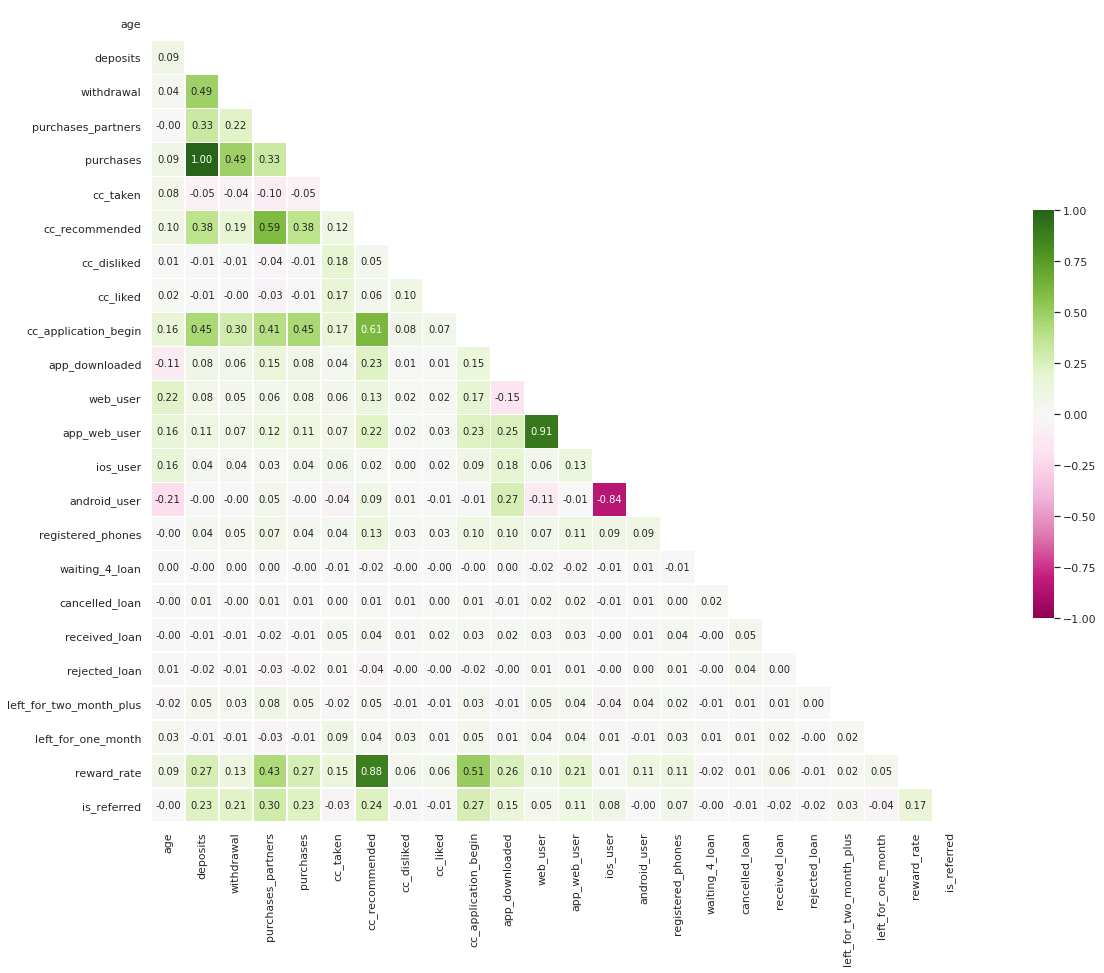

In [23]:
## Correlation Matrix
sns.set(style="white")

# Compute the correlation matrix
corr = dataset3.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(24, 15))

# Generate a custom diverging colormap
cmap = sns.color_palette("PiYG", 7, as_cmap=True) #Spectral,vlag,RdBu_r,BrBG

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, annot= True, annot_kws={'fontsize': 'small'}, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [24]:
(dataset2['app_downloaded']*dataset2['web_user']).equals(dataset2['app_web_user'])

True

* While looking at the data and the respective descriptions of the columns, I realised that the column app_web_user is a function of columns app_downloaded and web_user. This could negatively effect the model later. Hence this column should be discarded.

* Purchases column can be dropped too due to its perfect correlation with deposits and strong correlations with other features too.

In [25]:
# Removing Correlated Fields
dataset2 = dataset2.drop(columns = ['app_web_user','purchases', 'zodiac_sign'])

In [26]:
df = dataset2.copy()

In [27]:
## Data Preparation
user_identifier = df['user']
df = df.drop(columns = ['user'])

In [28]:
df = pd.get_dummies(df, columns=['housing','payment_type'])

In [29]:
df.head()

,churn,age,deposits,withdrawal,purchases_partners,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,ios_user,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred,housing_O,housing_R,housing_na,payment_type_Bi-Weekly,payment_type_Monthly,payment_type_Semi-Monthly,payment_type_Weekly,payment_type_na
0,0,37.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0.00,0,0,0,1,1,0,0,0,0
1,0,28.0,0,0,1,0,96,0,0,5,1,1,1,0,0,0,0,0,0,0,0,1.47,1,0,1,0,0,0,0,1,0
2,0,35.0,47,2,86,0,285,0,0,9,1,0,0,1,2,0,0,0,0,1,0,2.17,0,0,1,0,0,0,1,0,0
3,0,26.0,26,3,38,0,74,0,0,26,1,0,0,1,0,0,0,0,0,0,0,1.10,1,0,1,0,1,0,0,0,0
4,1,27.0,0,0,2,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0.03,0,0,0,1,1,0,0,0,0


In [30]:
df = df.drop(columns = ['housing_na','payment_type_na'])

In [31]:
df.head()

,churn,age,deposits,withdrawal,purchases_partners,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,ios_user,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred,housing_O,housing_R,payment_type_Bi-Weekly,payment_type_Monthly,payment_type_Semi-Monthly,payment_type_Weekly
0,0,37.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0.00,0,0,0,1,0,0,0
1,0,28.0,0,0,1,0,96,0,0,5,1,1,1,0,0,0,0,0,0,0,0,1.47,1,0,1,0,0,0,1
2,0,35.0,47,2,86,0,285,0,0,9,1,0,0,1,2,0,0,0,0,1,0,2.17,0,0,1,0,0,1,0
3,0,26.0,26,3,38,0,74,0,0,26,1,0,0,1,0,0,0,0,0,0,0,1.10,1,0,1,1,0,0,0
4,1,27.0,0,0,2,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0.03,0,0,0,1,0,0,0


In [32]:
df.to_csv('new_churn_data.csv', index = False)